# Applications et exemples issus des programmes de Sciences Physiques

## En seconde

*Remarque : nous allons utiliser ici un nouveau module, « numpy », très employé en sciences. Il permet de créer des tableaux, des objets proches des listes, mais qui offrent des actions supplémentaires en termes de création et d'opérations.*

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### 1. Bilan énergétique d'un système en mouvement
*B.O. : utiliser un langage de programmation pour effectuer le bilan énergétique d'un système en mouvement.* 

A partir d'une chronophotographie, on étudie la chute libre d'un objet de masse 𝑚 = 5,0 kg dans le champ de pesanteur terrestre. Les positions successives de l'objet sont regroupées dans les listes suivantes (l'altitude H est exprimée en $m$, le temps T est exprimé en $s$).

In [2]:
H = np.array([1.71, 1.65, 1.58, 1.49, 1.38, 1.28, 1.13, 0.99, 0.81, 0.64, 0.44, 0.23, 0.0])
T = np.arange(0, 0.5, 0.04)
print(T, H, sep = '\n')

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48]
[1.71 1.65 1.58 1.49 1.38 1.28 1.13 0.99 0.81 0.64 0.44 0.23 0.  ]


1. Construire le tableau (array) des vitesses moyennes du mobile $v_i = \dfrac{h_{i+1}-h_i}{t_{i+1}-t_i}$ pour $i$ allant de 1 à 11.
2. Obtenir les tableaux des énergies cinétique, potentielle et mécanique du mobile. 
3. Sur un même graphique, obtenir les tracés des courbes $E_C = f(t)$, $E_p = g(t)$ et $E_m = h(t)$. 

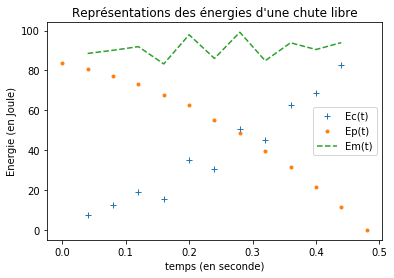

In [3]:
m = 5.0
g = 9.8
dt = 0.04

V = []
for i in range(1, len(H)-1):
    V.append((H[i+1]-H[i])/dt)
V = np.array(V)

Ec = 0.5*m*V**2 #Ces opérations sont permises par le type array et permettent de construire très rapidement 
Ep = m*g*H      #les tableaux demandés

Em = Ec + Ep[1:-1] #le tableau Ec compte 12 élements, le tableau Ep en compte 13.

plt.plot(T[1:-1], Ec, '+', label = "Ec(t)")
plt.plot(T, Ep, '.', label = "Ep(t)")
plt.plot(T[1:-1], Em, '--', label = "Em(t)")
plt.xlabel("temps (en seconde)")
plt.ylabel("Energie (en Joule)")
plt.title("Représentations des énergies d'une chute libre")
plt.legend()
plt.show()

### 2. Représentation et modélisation d'un mouvement bidimensionnel
*B.O. : Représenter les positions successives d’un système modélisé par un point lors d’une évolution unidimensionnelle ou bidimensionnelle à l’aide d’un langage de programmation.*

A partir d'une chronophotographie, on étudie le lancer parabolique d'un objet de masse $m$.
Les positions successives de l'objet sont regroupées dans les tableaux suivants (X et Y sont exprimés en $m$, T est exprimé en $s$) :

In [4]:
X = np.array([0, 0.41, 0.91, 1.39, 1.86, 2.33, 2.81, 3.33, 3.79, 4.31, 4.83, 5.36, 5.86, 6.34, 6.77])
Y = np.array([0, 0.52, 1.01, 1.42, 1.77, 2.02, 2.16, 2.19, 2.13, 1.96, 1.71, 1.38, 0.97, 0.50, 0])
dt = 0.1
T = np.arange(0, 1.5, dt)
print(T, X, Y, sep = '\n')

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]
[0.   0.41 0.91 1.39 1.86 2.33 2.81 3.33 3.79 4.31 4.83 5.36 5.86 6.34
 6.77]
[0.   0.52 1.01 1.42 1.77 2.02 2.16 2.19 2.13 1.96 1.71 1.38 0.97 0.5
 0.  ]


1. Représenter par un nuage de points les positions successives du mobile dans le repère (Ox, Oy)
2. Modéliser la courbe obtenue par une équation polynômiale du 2nd degré.

Modélisation : y(t) = -0.19x² + 1.28x


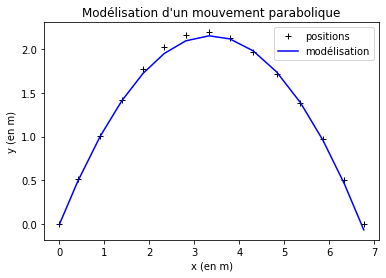

In [5]:
plt.plot(X, Y, 'k+', label = 'positions')

model = np.polyfit(X, Y, 2)
print(f"Modélisation : y(t) = {round(model[0], 2)}x² + {round(model[1], 2)}x")

Ymod = model[0]*X**2 + model[1]*X

plt.plot(X, Ymod, 'b-', label = 'modélisation')

plt.title("Vecteurs déplacement")
plt.xlabel("x (en m)")
plt.ylabel("y (en m)")
plt.title("Modélisation d'un mouvement parabolique")
plt.legend()
plt.show()

### 3. Représentation des vecteurs vitesse
*BO : Représenter des vecteurs vitesse d’un système modélisé par un point lors d’un mouvement à l’aide d’un
langage de programmation.*

On prolonge ici l'étude précédente.
1. Ecrire un script construisant la liste Vx des vitesses $v_x$ et la liste Vy des vitesses $v_y$ du mobile.
2. Obtenir une représentation des vecteurs vitesses, de $t_1$ à $t_{n-1}$. Vous prendrez garde aux bornes des boucles utilisées et notamment au nombre d'éléments contenus dans les différentes listes qui interviennent.

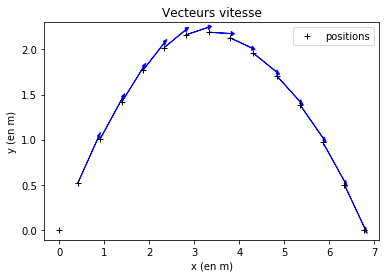

In [6]:
Vx, Vy = [], []

for i in range(1, len(X)-1) :
    deltax = X[i+1] - X[i-1]
    deltay = Y[i+1] - Y[i-1]
    deltat = 2 * dt
    Vx.append(deltax/(deltat))
    Vy.append(deltay/(deltat))

plt.plot(X, Y, "k+", label = "positions")

for i in range(len(Vx)) :
    plt.arrow(X[i+1], Y[i+1], Vx[i]*dt, Vy[i]*dt, head_width = 0.05, color = 'blue')

plt.title("Vecteurs vitesse")
plt.xlabel("x (en m)")
plt.ylabel("y (en m)")
plt.legend()
plt.show()

### 4. Accélération et bilan des forces
*B.O. : Utiliser un langage de programmation pour étudier la relation approchée entre la variation du vecteur vitesse d’un système modélisé par un point matériel entre deux instants voisins et la somme des forces appliquées sur celui-ci*

Un exemple de tracé que vous pourriez obtenir à partir des valeurs précédentes... lorsque vous aurez construit votre propre activité !

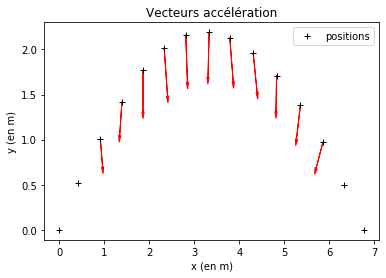

In [7]:
x = np.array([0, 0.41, 0.91, 1.39, 1.86, 2.33, 2.81, 3.33, 3.79, 4.31, 4.83, 5.36, 5.86, 6.34, 6.77])
y = np.array([0, 0.52, 1.01, 1.42, 1.77, 2.02, 2.16, 2.19, 2.13, 1.96, 1.71, 1.38, 0.97, 0.50, 0])
dt = 0.1
m = 5.0
g = 9.8

Vx, Vy = [], []
for i in range(1, len(x)-1) :
    deltax = x[i+1] - x[i-1]
    deltay = y[i+1] - y [i-1]
    deltat = 2 *dt
    Vx.append(deltax/(deltat))
    Vy.append(deltay/(deltat))


ax, ay = [], []
for i in range(1, len(Vx)-1) :
    deltavx = Vx[i+1] - Vx[i-1]
    deltavy = Vy[i+1] - Vy[i-1]
    deltat = 2*dt
    ax.append(deltavx/deltat)
    ay.append(deltavy/deltat)


plt.plot(x, y, "k+", label = 'positions')

for i in range(len(ax)) :
    plt.arrow(x[i+2], y[i+2], 0.05*ax[i], 0.05*ay[i], head_width = 0.05, color = 'red')

plt.title("Vecteurs accélération")
plt.xlabel("x (en m)")
plt.ylabel("y (en m)")
plt.legend()
plt.show()

## En première

### 1. On lit l'algorithme, on lance l'algorithme, on comprend l'algorithme...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

def trace_trajectoire(f,V0,alpha,h):#Fonction qui permet de tracer la courbe d'une trajectoire
    plt.axis([-1,30,-1,10])
    plt.grid()
    x=np.array([])
    x=np.append(x,np.linspace(0,20,50))
   
    #np.quiver(x,f(V0,alpha,h))
    
    plt.plot(x,f(V0,alpha,h,x),'.',color='red') 
    
    plt.plot([-1,30],[2,2],color='blue')
    
    plt.show()
  
def hauteur(V0,alpha,h,x):#Fonction qui permet de déterminer la hauteur de la trajectoire
    a=-4.9/(V0**2*(cos(alpha*pi/180))**2)
    b=tan(alpha*pi/180)
    c=h
    return a*x**2+b*x+c

def impact(V0,alpha,h,e):#Fonction qui permet par balayage de déterminer le point d'impact avec le sol
    x=0
    y=2
    while y>0.01 :
        x=x+e
        y=hauteur(V0,alpha,h,x)
    return x
    
def service_valide(V0,alpha,a):
    
    if a==1:
        h=1.2
        d=0
    elif a==2:
        h=2.5
        d=0.5
    else:
        h=3
        d=1
    print(round(hauteur(V0,alpha,h,d+9),2))
    trace_trajectoire(hauteur,V0,alpha,h)
    if b=='F':
        if hauteur(V0,alpha,h,d+9)>2.24 and impact(V0,alpha,h,0.01)<18+d:
            print("Le service est valide")
        else:
            print("Le service n'est pas valide")
    elif b=='G':
        if hauteur(V0,alpha,h,d+9)>2.43 and impact(V0,alpha,h,0.01)<18+d:
            print("Le service est valide")
        else:
            print("Le service n'est pas valide")

    
    
#Programme principal
 
V0=float(input("Entrez la valeur de la vitesse initiale :"))
alpha=float(input("Entrez la valeur de l'angle initial :"))
print("Quel est le service effectué par le joueur :")
print("1 : Service à la cuillère")
print("2 : Service flottant :")
print("3 : Service smatché :")
a=int(input("Entrez votre choix :"))
print("C'est un match de filles ou de garçons ?")
print("F : match de filles")
print("G : match de garçons")
b=input("Entrez votre choix :")

service_valide(V0,alpha,a)